In [31]:
# Import library
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [34]:
# 1 Buat folder dataset mini otomatis
base_dir = "data"
categories = ["Trash", "Recycle", "Organic"]
os.makedirs(base_dir, exist_ok=True)

for cat in categories:
    cat_dir = os.path.join(base_dir, cat)
    os.makedirs(cat_dir, exist_ok=True)
    for i in range(5):
        # Gambar dummy RGB 64x64
        img = np.random.randint(0, 256, (64,64,3), dtype=np.uint8)
        plt.imsave(os.path.join(cat_dir, f"{cat}_{i}.png"), img)

In [35]:
# ImageDataGenerator untuk training

datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_gen = datagen.flow_from_directory(
    base_dir,
    target_size=(64,64),
    batch_size=4,
    class_mode='categorical',
    subset='training'
)

val_gen = datagen.flow_from_directory(
    base_dir,
    target_size=(64,64),
    batch_size=4,
    class_mode='categorical',
    subset='validation'
)

Found 12 images belonging to 3 classes.
Found 3 images belonging to 3 classes.


In [36]:
# Model CNN sederhana
model = Sequential([
    Conv2D(16, (3,3), activation='relu', input_shape=(64,64,3)),
    MaxPooling2D(2,2),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(len(categories), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [37]:
# 5 Train model
history = model.fit(train_gen, validation_data=val_gen, epochs=5)


Epoch 1/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 247ms/step - accuracy: 0.2500 - loss: 2.0792 - val_accuracy: 0.3333 - val_loss: 1.0820
Epoch 2/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.3333 - loss: 1.1547 - val_accuracy: 0.3333 - val_loss: 1.1359
Epoch 3/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.5000 - loss: 1.0962 - val_accuracy: 0.3333 - val_loss: 1.1107
Epoch 4/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.6667 - loss: 1.0433 - val_accuracy: 0.3333 - val_loss: 1.1041
Epoch 5/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.6667 - loss: 0.9966 - val_accuracy: 0.3333 - val_loss: 1.1084


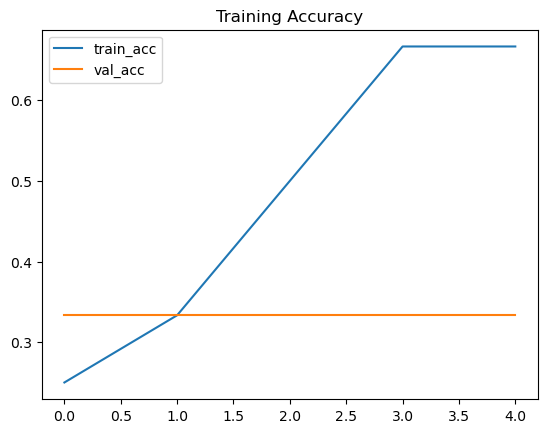

In [38]:
# 6 Visualisasi akurasi
plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()
plt.title("Training Accuracy")
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step


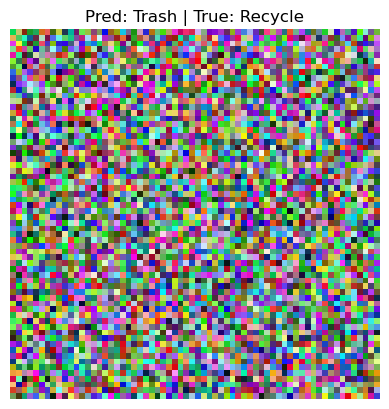

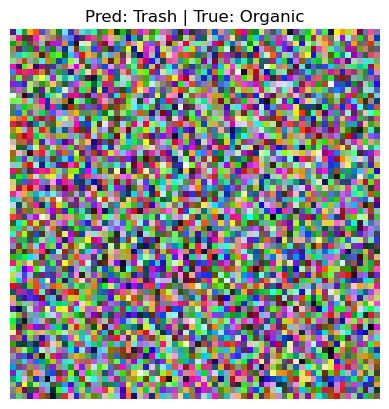

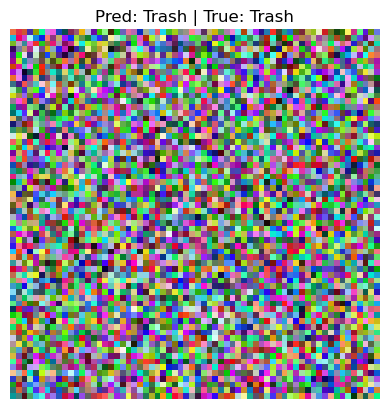

In [39]:
#7 Visualisasi beberapa gambar sample
sample_imgs, sample_labels = next(val_gen)
preds = model.predict(sample_imgs)

for i in range(len(sample_imgs)):
    plt.imshow(sample_imgs[i])
    plt.title(f"Pred: {categories[np.argmax(preds[i])]} | True: {categories[np.argmax(sample_labels[i])]}")
    plt.axis('off')
    plt.show()